In [29]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt


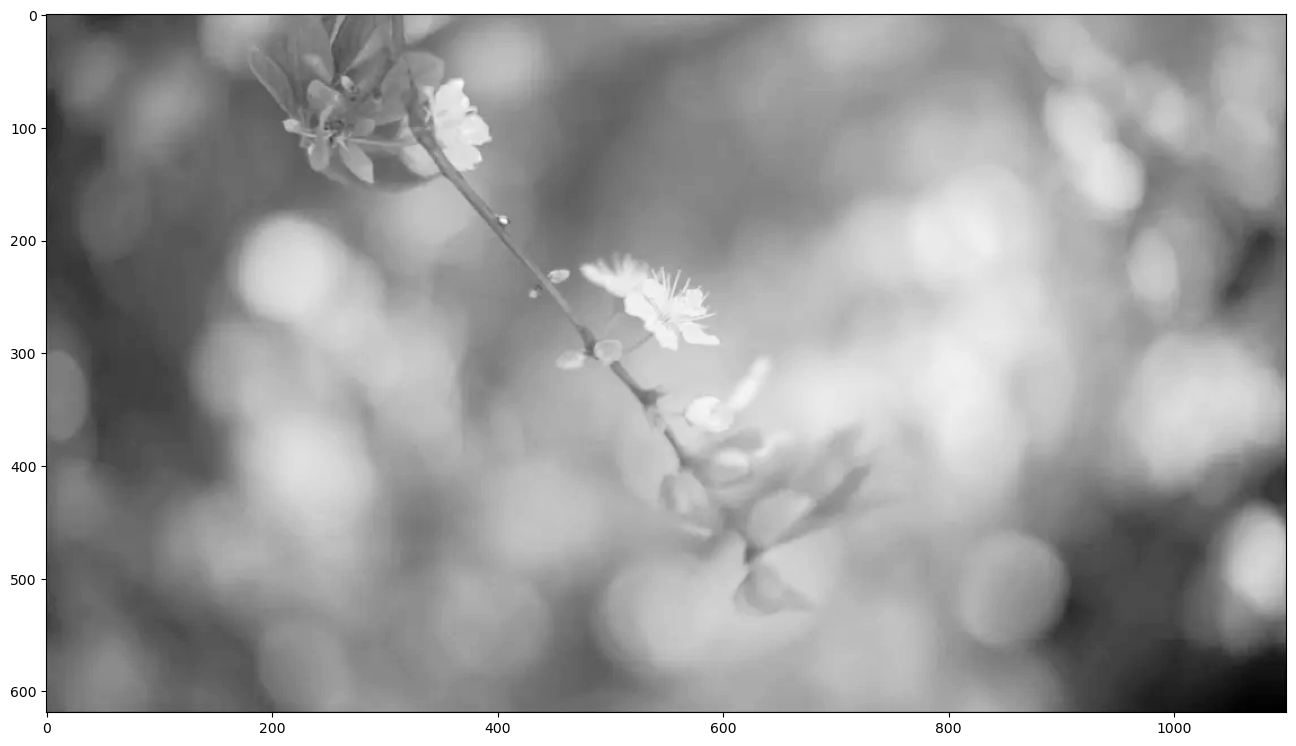

In [30]:
path= "flower.png"
image= cv.imread(path)
grey_image= cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.imshow(grey_image, cmap = 'Greys_r')
plt.show()
#elle apparaît un peu sombre et manque de détails, en particulier dans les zones d'ombre. 

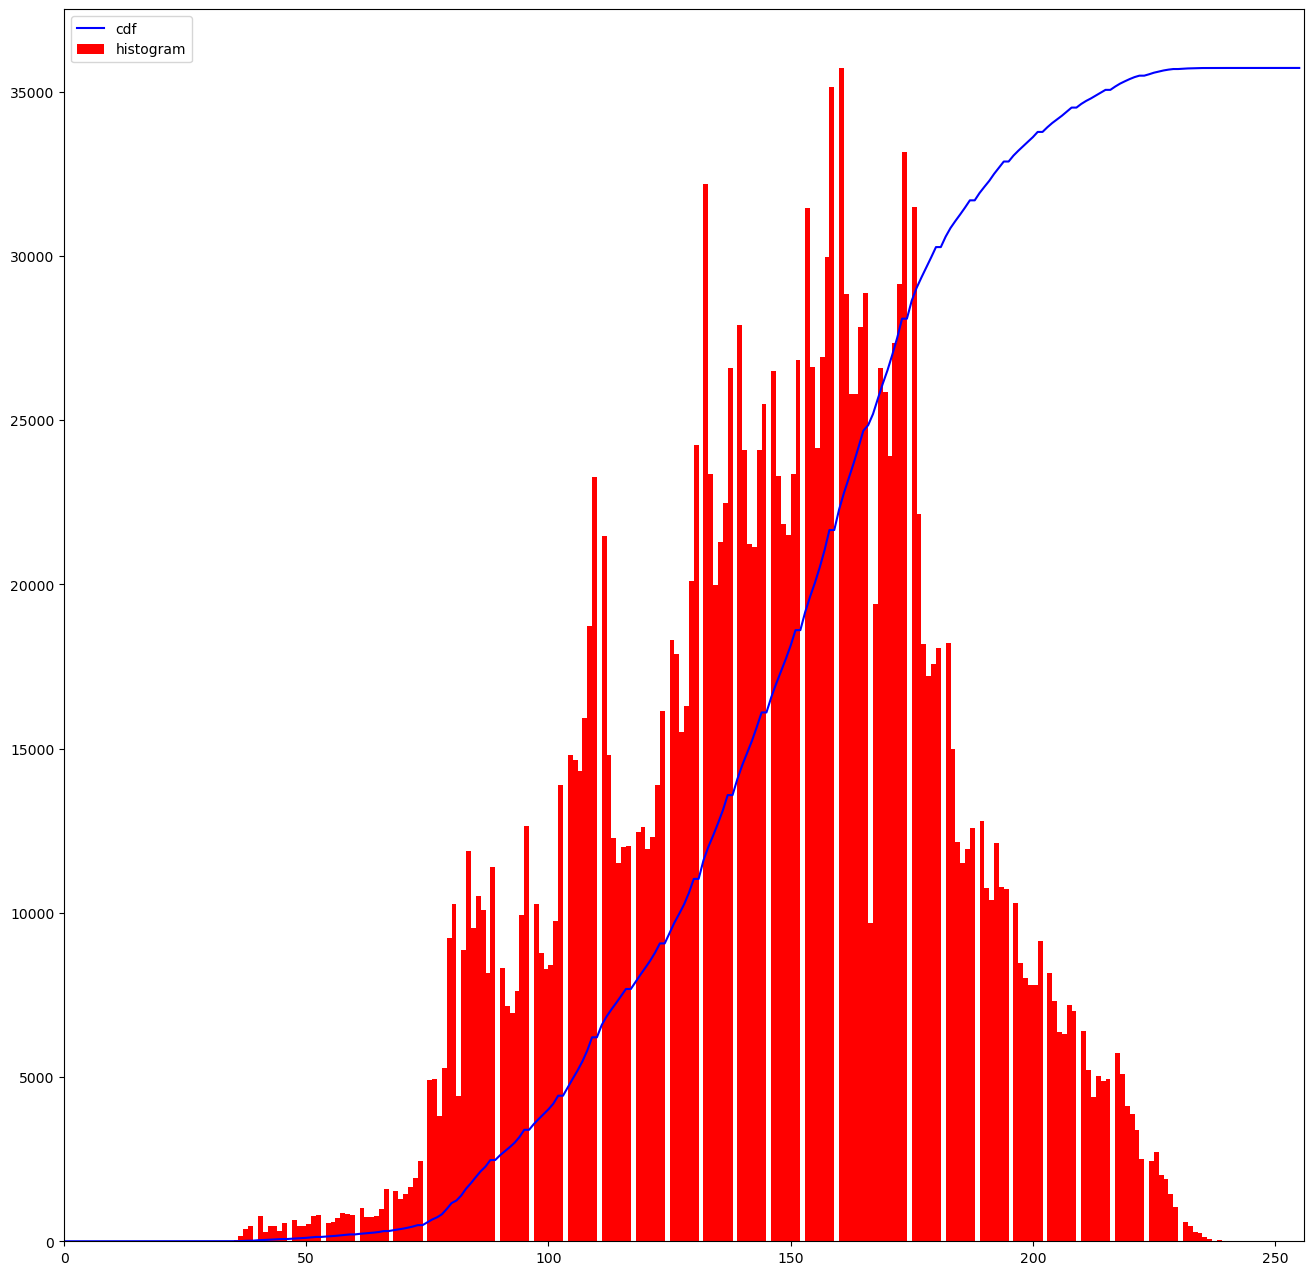

In [31]:
hist,bins = np.histogram(image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
#L'histogramme représente les intensités des pixels de l'image originale, a gauche les valeurs sont faibles, au milieu, on atteint le pic, puis les intensités baissent 
#la majorité des valeurs élevées des intensités sont concentrées au milieu
#les intensités ne varient pas beaucoup donc l'image est de faible contraste
#la courbe CDF représente comment l'intensité des pixels est distribuée 
#la CDF commence lentement et augmente rapidement mais n'atteint pas la valeur maximale


<function matplotlib.pyplot.show(close=None, block=None)>

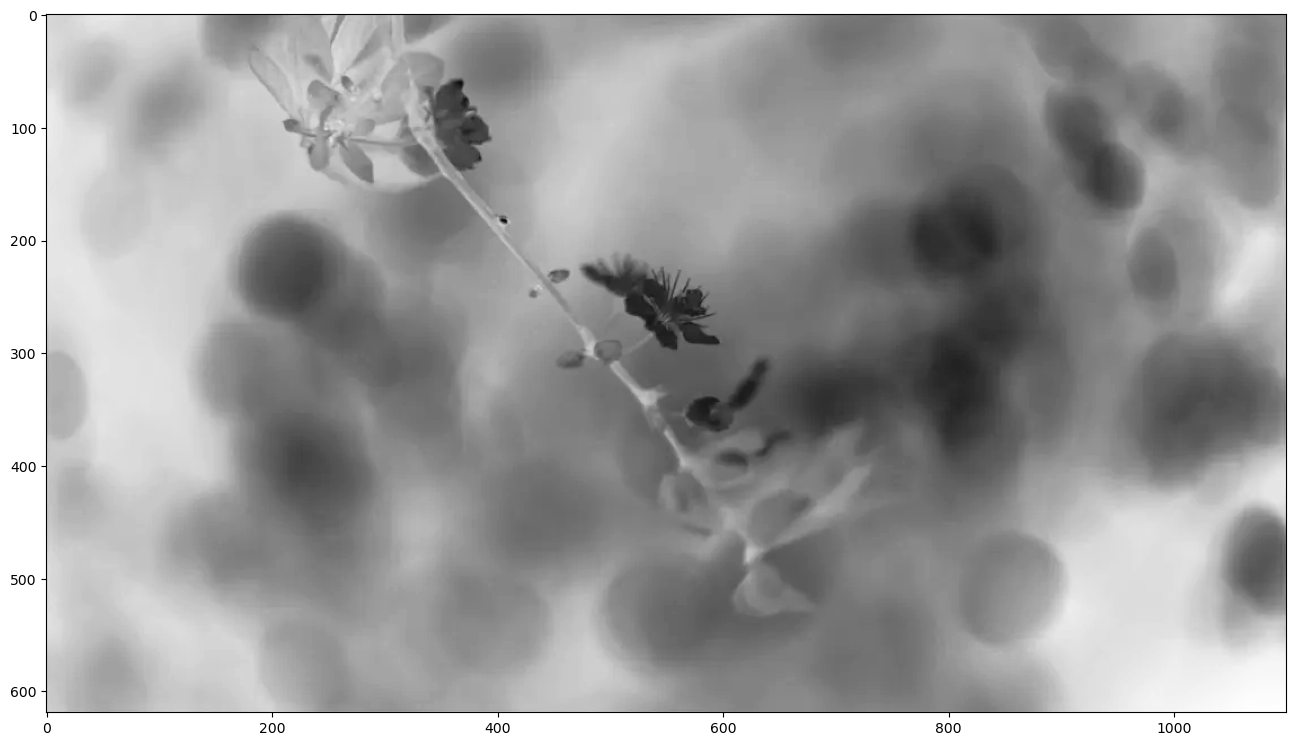

In [32]:
inverse_image= 255- grey_image
plt.imshow(inverse_image, cmap= "Greys_r")
plt.show

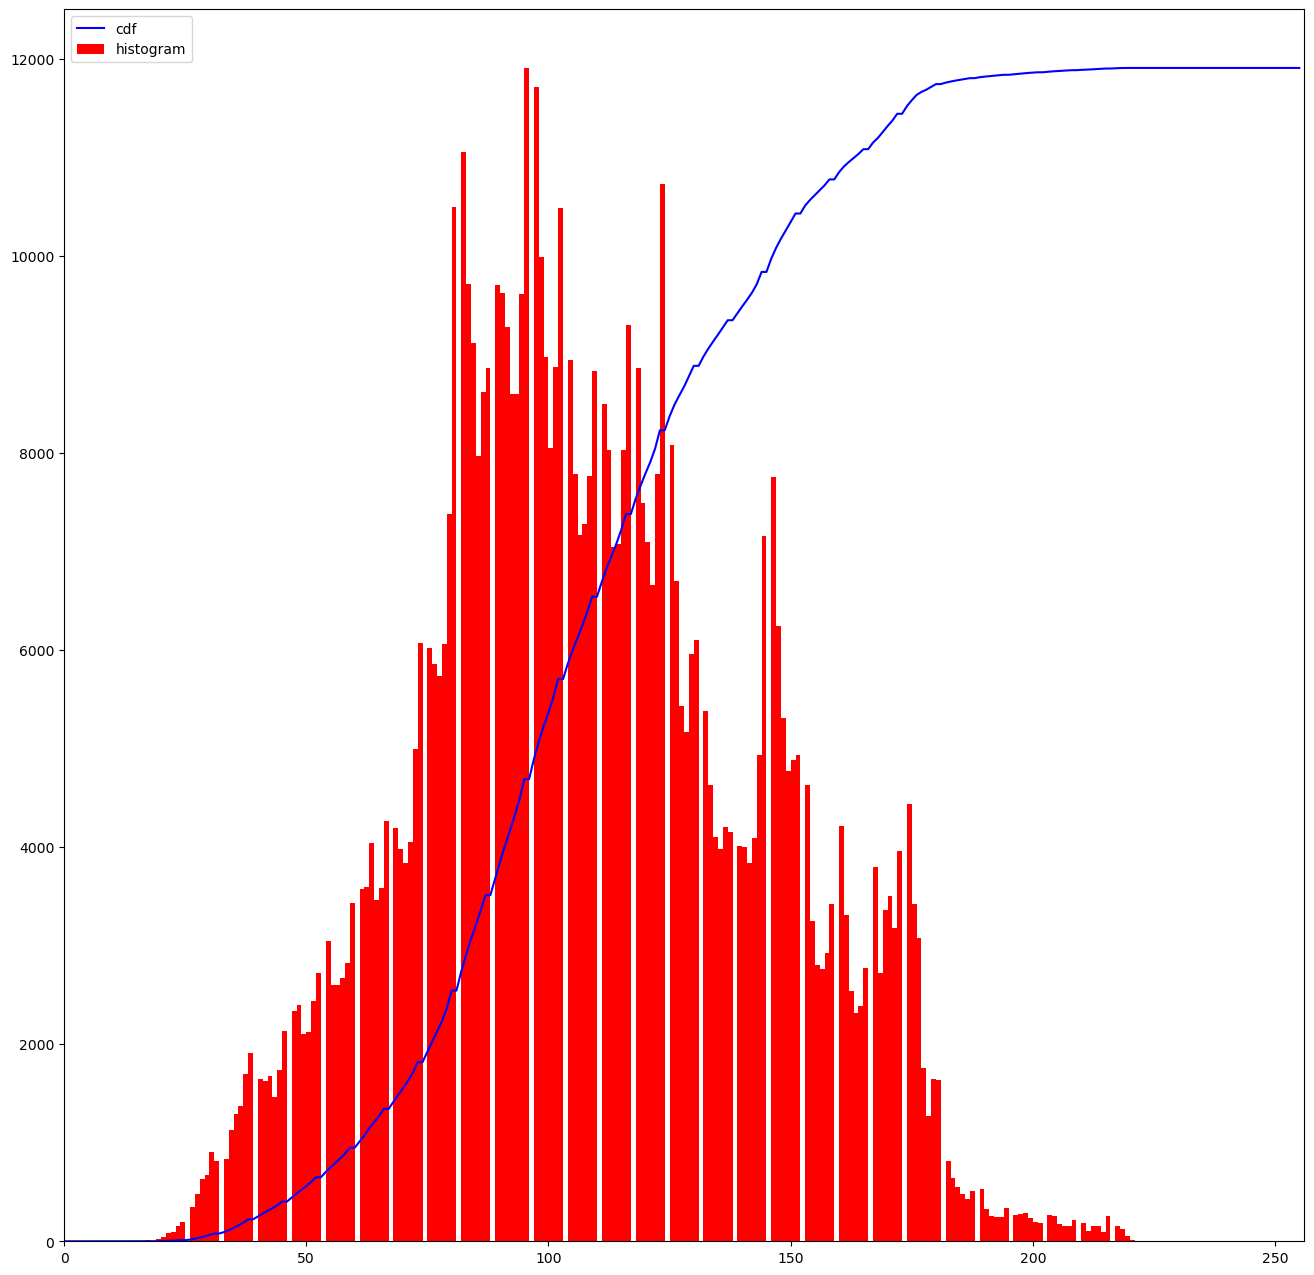

In [33]:
hist,bins = np.histogram(inverse_image.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(inverse_image.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

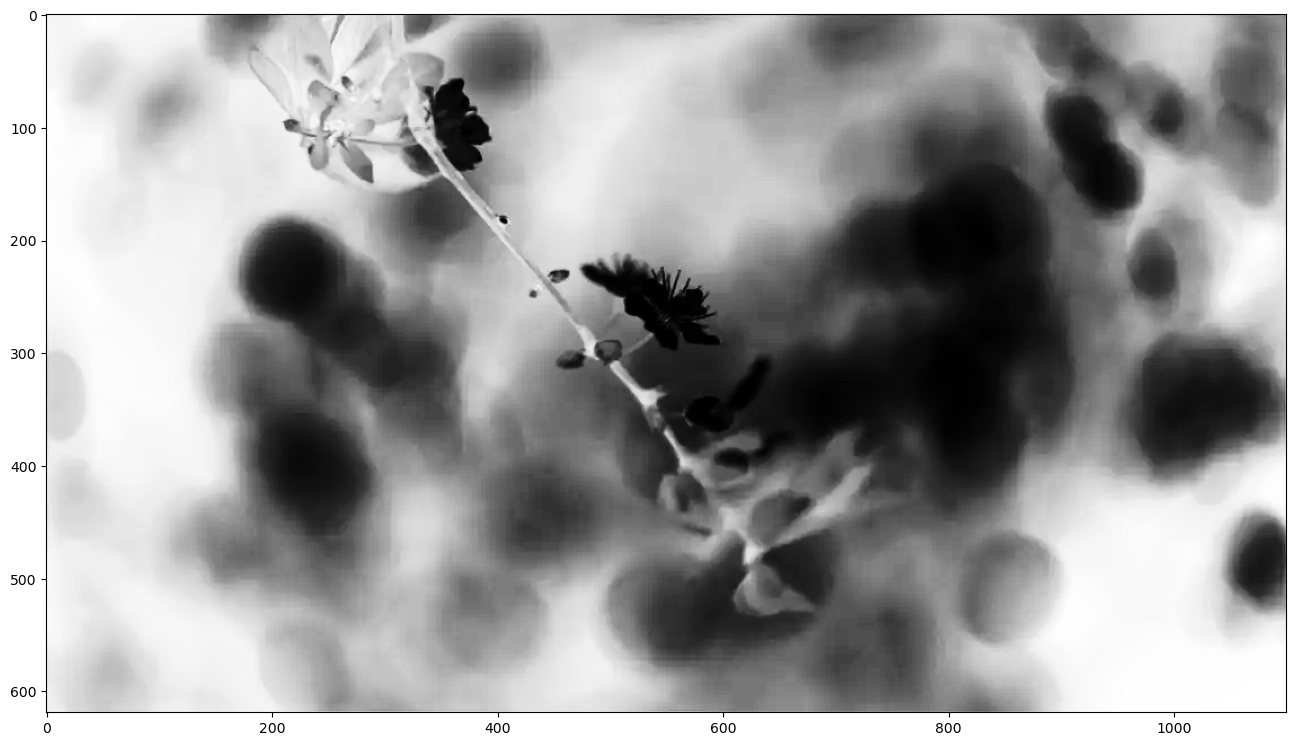

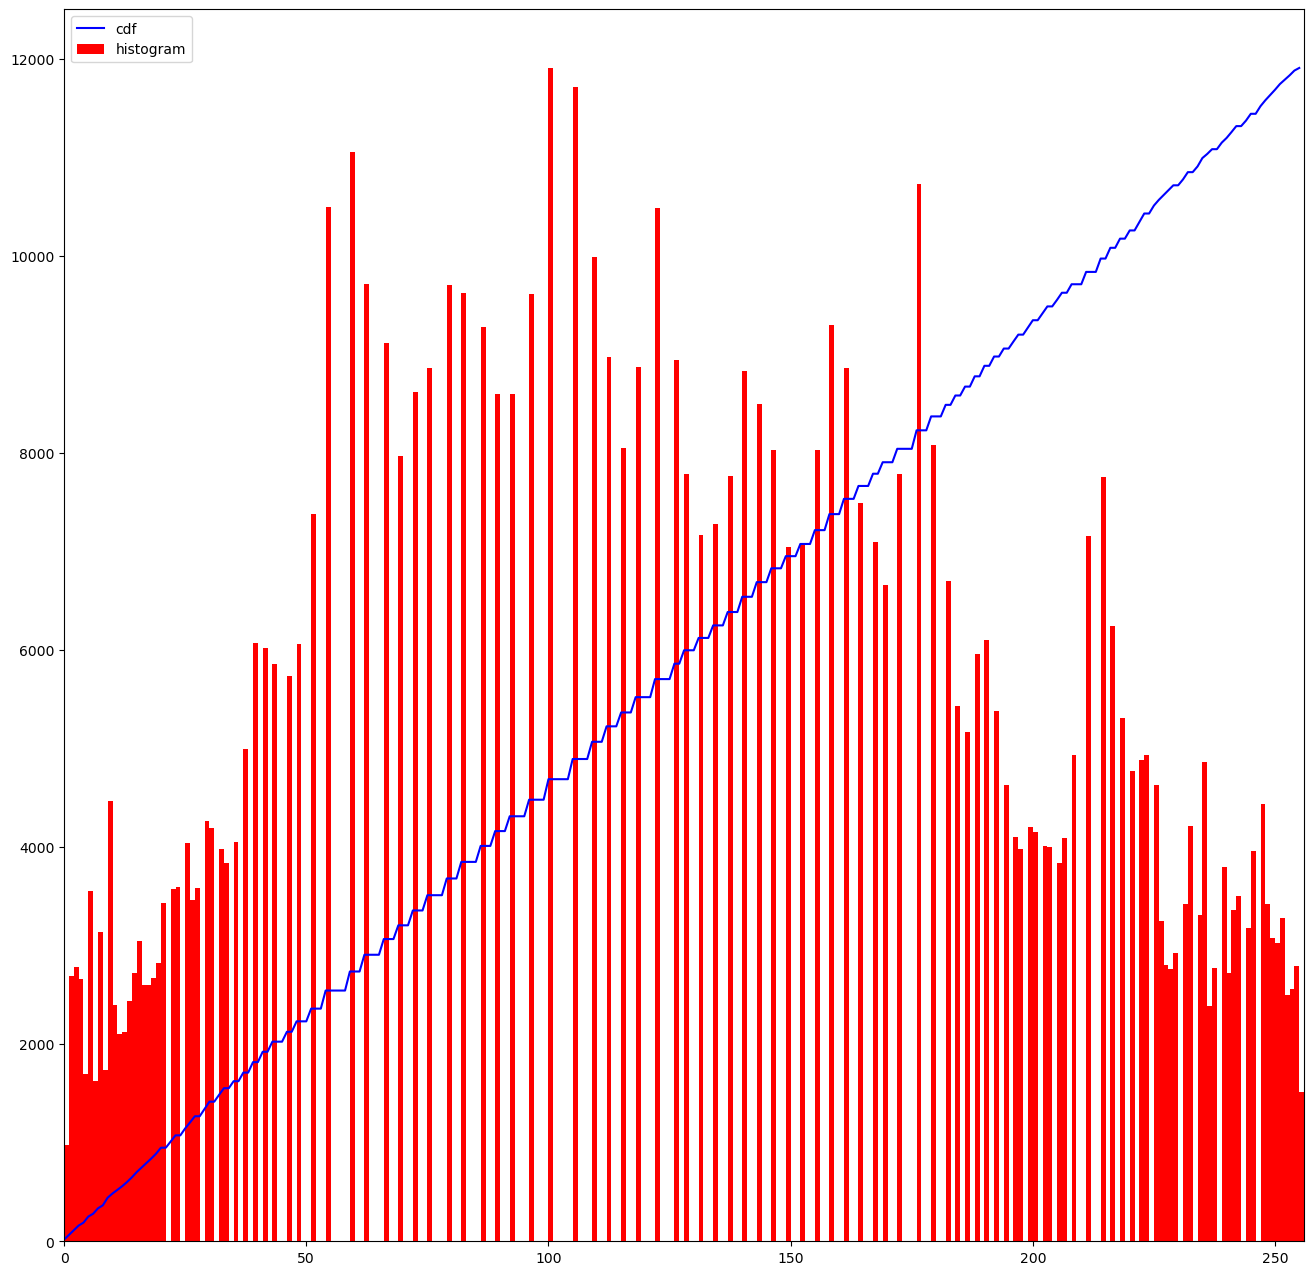

In [34]:
equ = cv.equalizeHist(inverse_image)
plt.imshow(equ, cmap = 'Greys_r')
plt.show()
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15272\2023889921.py:19: FutureWarning: `selem` is a deprecated argument name for `equalize`. It will be removed in version 1.0. Please use `footprint` instead.
  img_local = rank.equalize(img, selem=kernel)


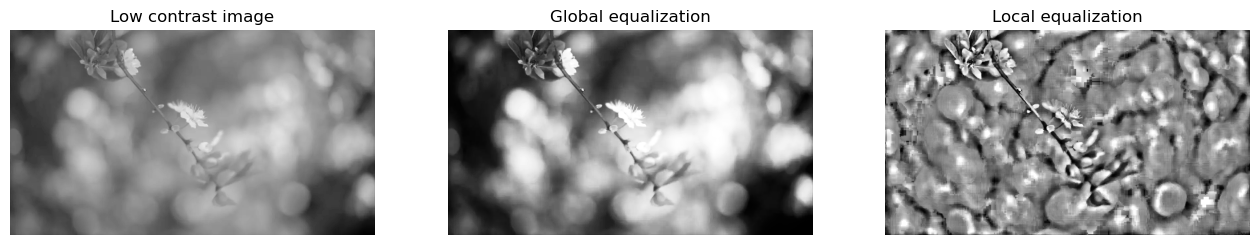

In [35]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from skimage import data
from skimage.util import img_as_ubyte
from skimage import exposure
import skimage.morphology as morp
from skimage.filters import rank
from skimage.io import imsave, imread
# Original image
#img = img_as_ubyte(data.moon())
path = 'flower.png'
img = img_as_ubyte(imread(path, as_gray=True))
# Global equalize
img_global = exposure.equalize_hist(img)
# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, selem=kernel)
plt.rcParams['figure.figsize'] = [16, 16]
fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)
ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()
ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()
ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()
plt.show()

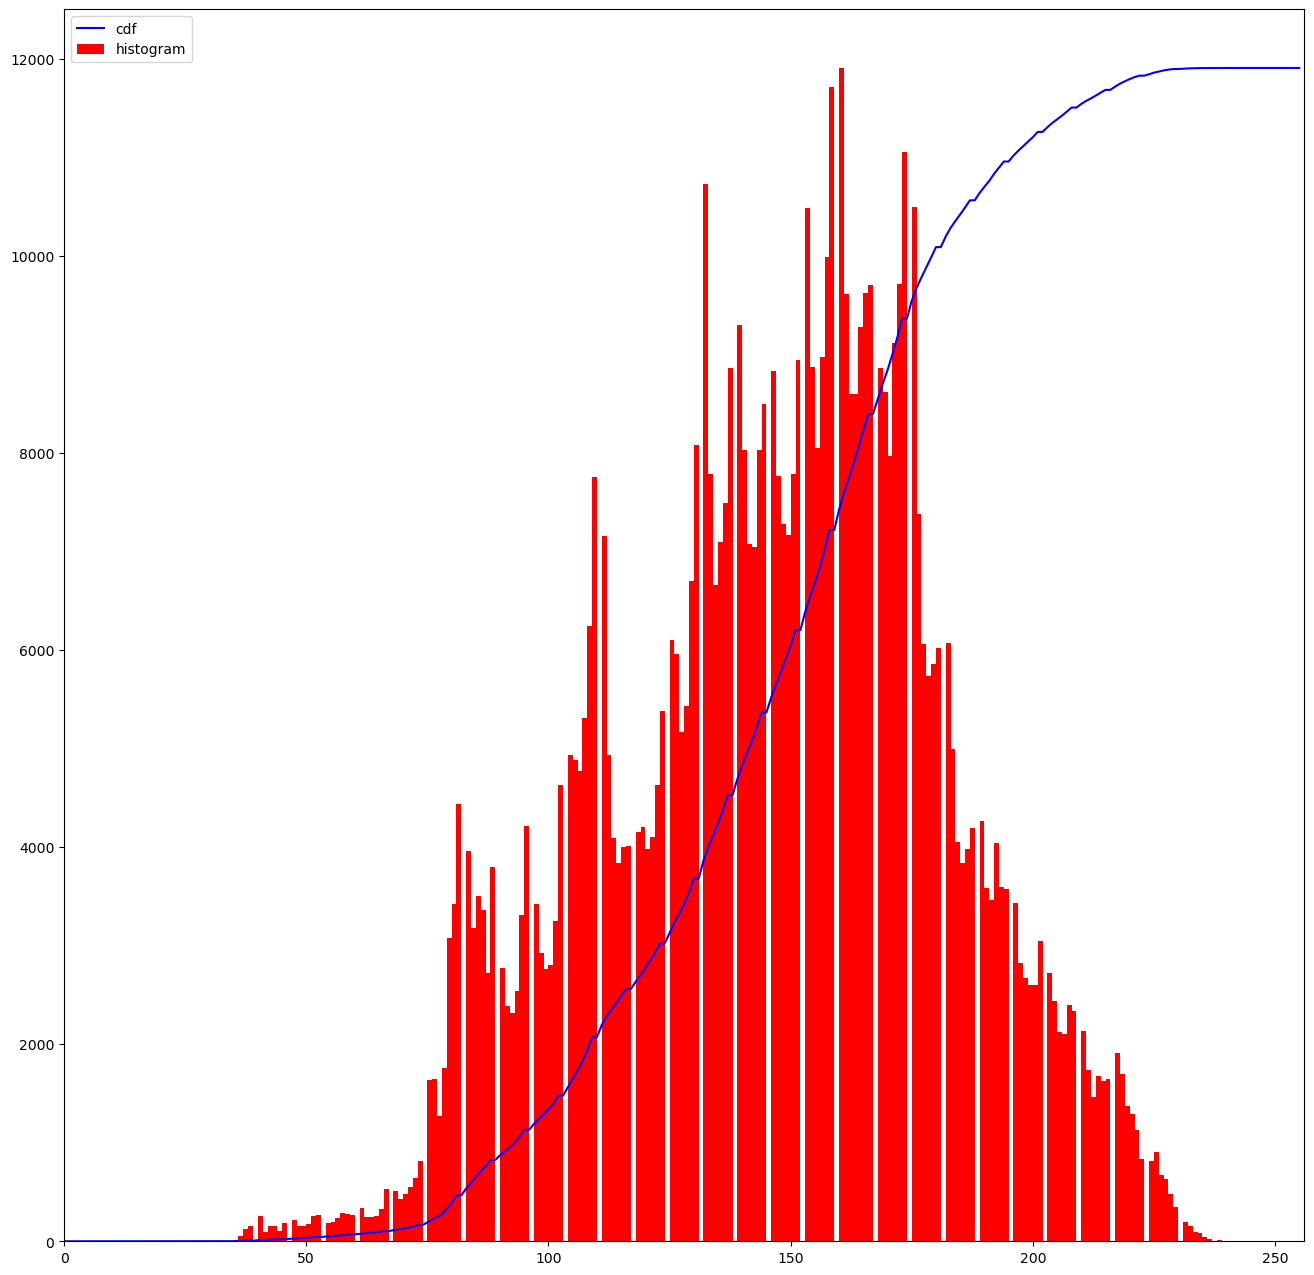

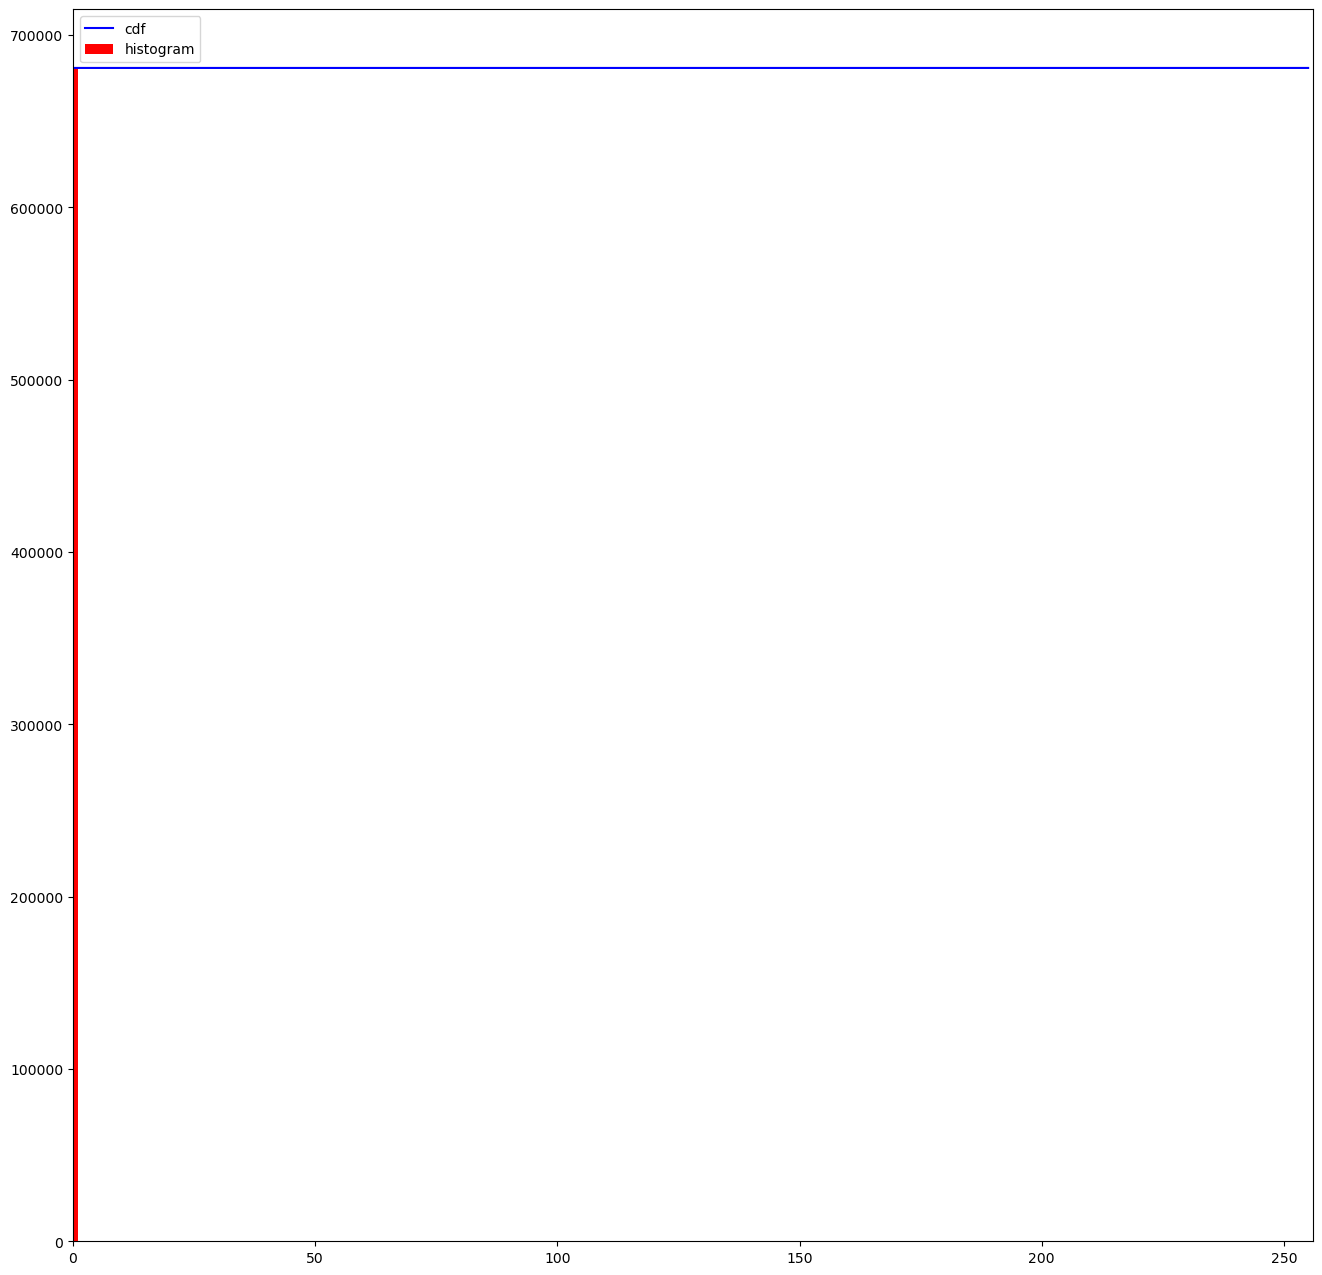

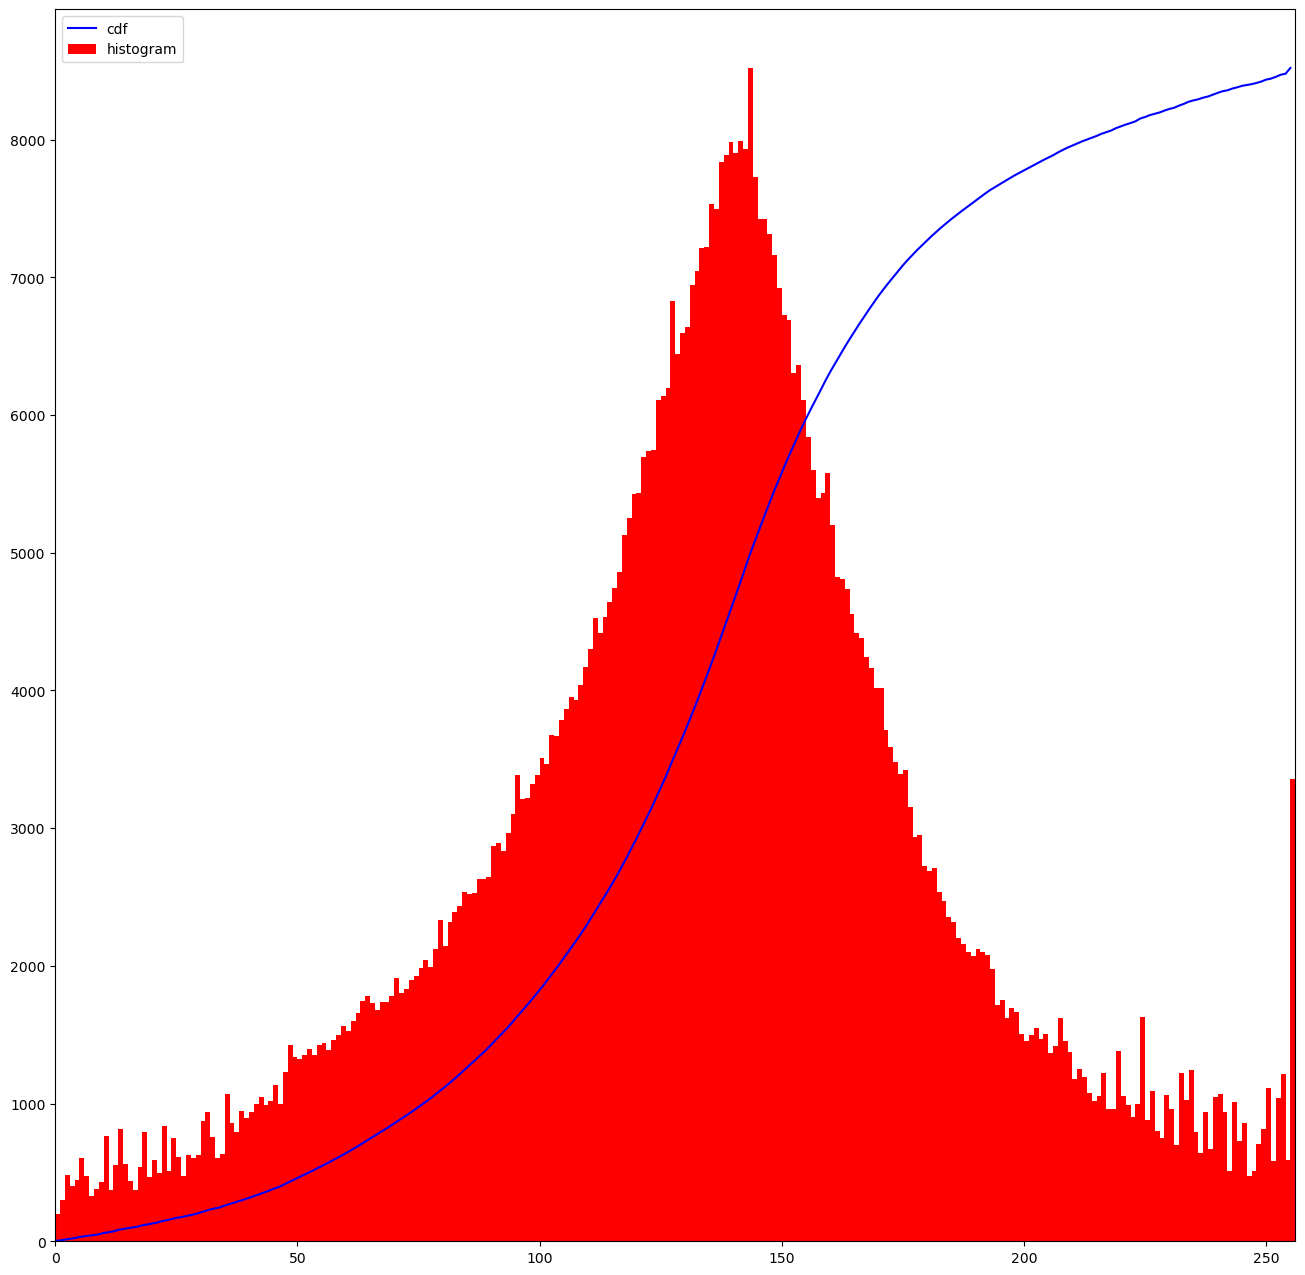

In [36]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

hist,bins = np.histogram(img_global.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_global.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
#les valeurs d'intensité de l'ensemble de l'image sont étirées de manière à ce que l'histogramme soit réparti plus uniformément sur toute la gamme des valeurs des pixels.

hist,bins = np.histogram(img_local.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img_local.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
#l'image est divisée en petits morceaux, et le contraste de chaque morceau est amélioré séparément en utilisant l'égalisation de l'histogramme.

#on a utilisé ces deux méthodes afin d'améliorer le contraste en redistribuant les valeurs d'intensité des pixels

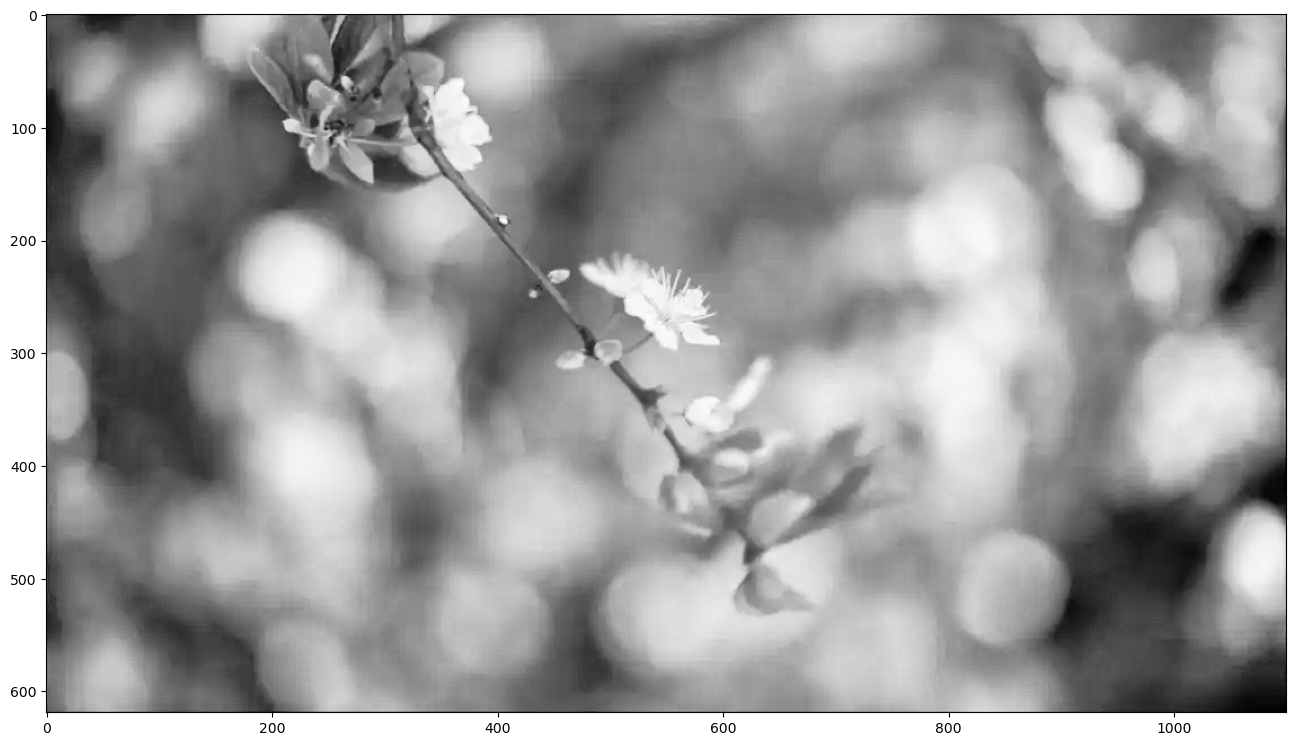

In [37]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
#img = cv.imread('tsukuba_l.png',0)
path = "flower.png"
img = cv.imread(path)
grayimg = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# create a CLAHE object (Arguments are optional).
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(grayimg)
#cv.imwrite('clahe_2.jpg',cl1)
plt.imshow(cl1, cmap="Greys_r")
plt.show()

#le contraste de l'image est clairement amélioré, l'image résultante a un contraste plus élevé que l'image originale
#les regions claires et sombres apparaissent plus distinctes
#les details de l'image sont mis en valeur 